In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import pylab as plt
import pandas as pd
import tensorflow as tf
import pickle

def gload(gsname):
    with tf.io.gfile.GFile(gsname, "rb") as file:
        obj = pickle.load(file)
    return obj

def load_precomp(basedir):
    Ms = gload(f'{basedir}/Mlist')
    ks = gload(f'{basedir}/ks')
    return Ms, ks

def load(name):
    return load_precomp(f'gs://hml-public/dd/{name}')

In [9]:
import numpy as np
import pylab as plt
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import pylab as plt
import pandas as pd
import tensorflow as tf
import pickle

#load the data "M_100.pkl" using pickle
with open('M_066.pkl', 'rb') as f:
    Ms = pickle.load(f)
with open('ks', 'rb') as f:
    ks = pickle.load(f)

#Ms, ks = load('cifar10-resnet18k-p15-adam-reps')

## DATA FORMAT:
## M = Ms[{0, 1, 2}] : {0, 10, 20}% label noise
## M['Test Error'][]

1000


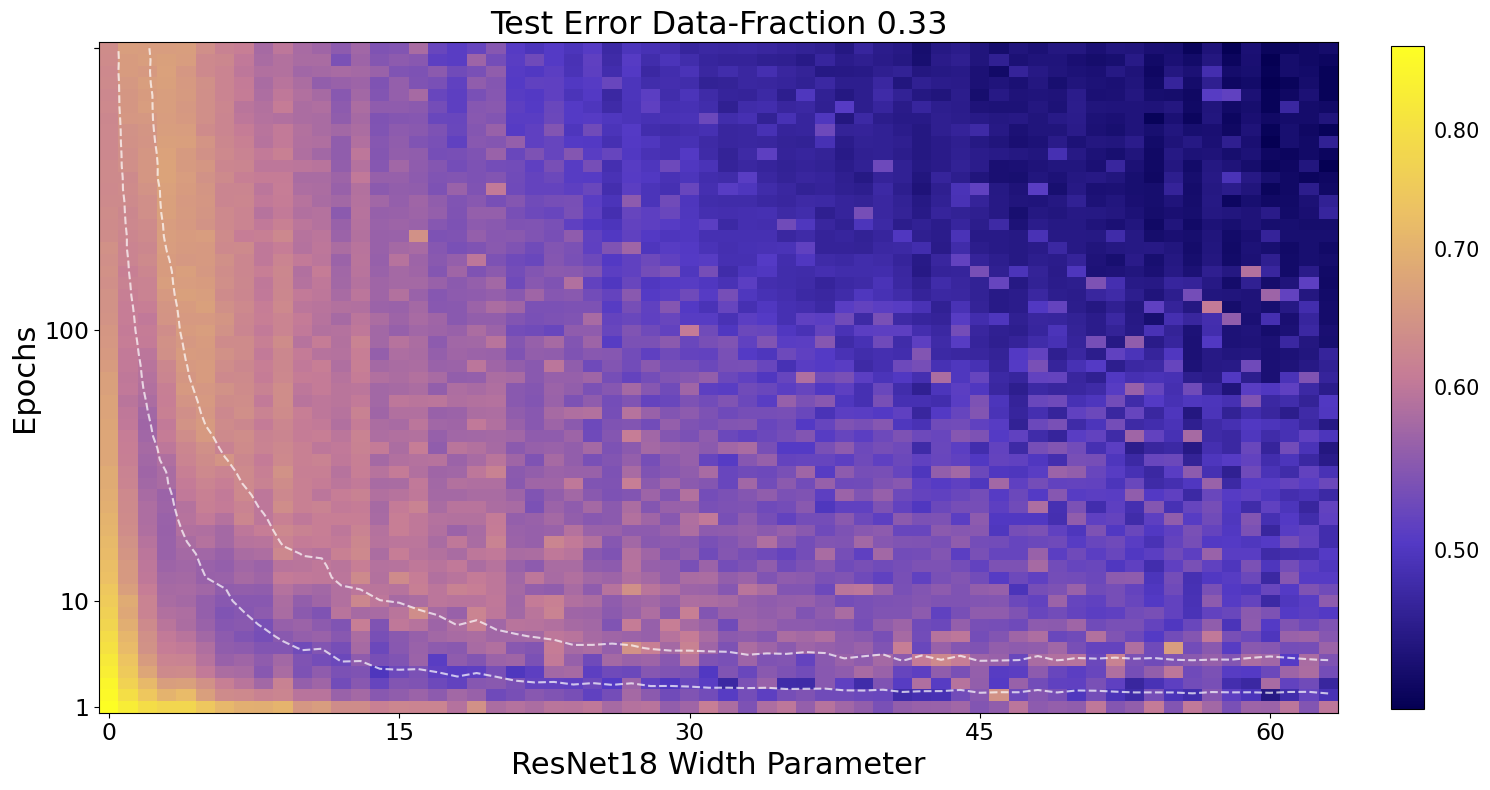

In [8]:
def plot_ocean(Ms, ks, base, sup_title='', title = 'Test Error',fraction = '1',
               contours=[0.15, 0.5],
               x_ticks_fs = 17, y_ticks_fs = 17, x_label_fs = 22, y_label_fs = 22, cbar_fs = 15, title_fs = 23):
    
    def x_fmt(x):
        decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
        suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
        if x == 0:
            return str(0)
        for i, d in enumerate(decades):
            if np.abs(x) >= d:
                val = x/float(d)
                signf = len(str(val).split(".")[1])
                if signf == 0:
                    return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
                else:
                    if signf == 1:
                        if str(val).split(".")[1] == "0":
                            return '{val:d}{suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                    tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                    return tx.format(val=val, suffix=suffix[i])
        return x

    # Get steps grid, number of parameters
    
    max_steps = Ms[title].shape[1]
    print(max_steps)
    eps = np.unique(np.array(base**np.arange(0, np.log(max_steps)/np.log(base)), dtype=int)-1)

    # Colormap
    with open('custom_colormaps/colormap_inferno_strong_1.txt', 'r') as f:
        a = f.read()
    C = [list(map(int, val.split(' '))) for val in a.split('\n')[:-1]]
        
    cm = mpl.colors.ListedColormap(np.array(C)/255.0)

    # Start plotting
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()
    

    M = Ms[title][:, eps].T

    if title == 'Test Error':
        im = ax.imshow(M, cmap=cm, norm=colors.LogNorm(vmin=np.min(M), vmax=np.max(M)),
                      aspect='auto',
                   interpolation='none')  
    elif title == 'Train Error':
        im = ax.imshow(M, cmap=cm, norm=colors.Normalize(vmin=np.min(M), vmax=0.8),
                       aspect='auto',
                   interpolation='none')

    if contours is not None:
        ax.contour(Ms['Train Error'][:, eps].T, levels=contours, colors='white', linestyles='dashed', alpha=0.7)

    
    # Y-axis
    ten_powers = 10 ** np.arange(10) - 1
    ten_powers = ten_powers[ten_powers < max_steps]

    yvals = eps
    indices = []
    for val in ten_powers:
        indices += [np.argmin(np.abs(yvals-val))]
    
    ax.set_yticks(np.arange(len(eps)))
    ax.set_yticks(indices + [len(eps)-1])
    ax.set_yticklabels([x_fmt(val+1) for val in ten_powers] + [''], fontsize=y_ticks_fs)
    ax.set_ylabel('Epochs', fontsize=y_label_fs)
    ax.invert_yaxis()

    # X-axis
    x_idx = np.arange(M.shape[1])[::15]
    x_vals = x_idx
    x_labs = ['%d' % (n) for n in x_vals]
    ax.set_xticks(x_idx)
    ax.set_xticklabels(x_labs, fontsize=x_ticks_fs)
    ax.set_xlabel('ResNet18 Width Parameter', fontsize=x_label_fs)

    
    # Colorbar
    ticks = np.linspace(0.0, 0.8, 9)
    cbar = fig.colorbar(im, fraction=0.025, pad=0.04, ticks=ticks)
    #cbar.set_ticks(ticks)
    
    cbar.ax.get_yaxis().set_major_formatter(matplotlib.ticker.NullFormatter())
    cbar.ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    cbar.ax.minorticks_off()
    
    cbar.ax.set_yticklabels(['%.2f'%val for val in ticks])
    
    cbar.ax.tick_params(labelsize=cbar_fs) 
    cbar.ax.tick_params(right=False)

    ax.set_title(title+' Data-Fraction '+fraction, fontsize=title_fs)
        
    plt.tight_layout()
    fig.suptitle(sup_title, fontsize=title_fs)
    return fig


fig = plot_ocean(Ms[0], ks, title='Test Error',fraction = '0.66', base = 1.1)

1000


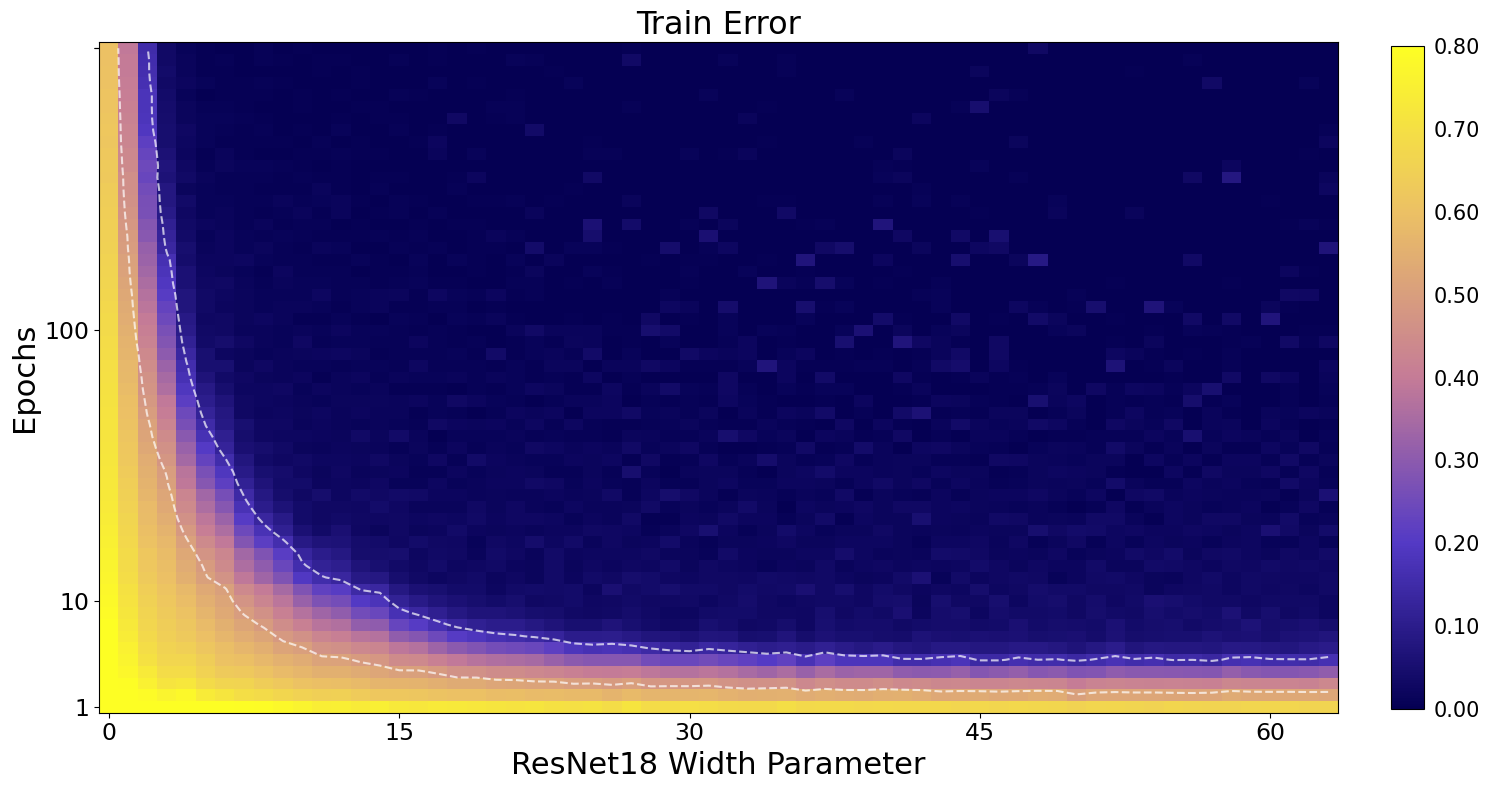

In [3]:
fig = plot_ocean(Ms[1], ks, title='Train Error', base = 1.1)